<a href="https://colab.research.google.com/github/lala991204/AI-based-financial-data-analysis/blob/master/user_data/fee_RFM_kmeans_user_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
user_df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/user_data/data/MLRD_UserData_20220120.csv", encoding='cp949')
user_df1

In [ ]:
user_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371206 entries, 0 to 371205
Data columns (total 73 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   user_id                                           371206 non-null  int64  
 1   signup_time                                       371206 non-null  object 
 2   no_of_days_since_signed_up                        371206 non-null  int64  
 3   signup_device_type                                371206 non-null  object 
 4   signup_country_en                                 371206 non-null  object 
 5   final_country_en                                  371206 non-null  object 
 6   signup_broker_name                                371206 non-null  object 
 7   signup_channel_id                                 371206 non-null  object 
 8   signup_channel_type                               371206 non-null  object 
 9   user

In [ ]:
user_df11 = user_df1[['user_id', 'no_of_days_since_last_trade', 'total_no_of_trade_times', 'fee_total_usdt_since_signup']]
user_df11

In [ ]:
user_df12 = user_df1[['user_id', 'no_of_days_since_last_trade', 'total_no_of_trade_times', 'accumulative_trading_amount_in_usdt']]
user_df12

In [ ]:
# user_df = user_df1.dropna(axis=0)        
# user_df.info()

# 세 개의 컬럼에 대해 결측치 행 모두 제거
user_df = user_df11.dropna(axis=0)
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85859 entries, 1 to 371191
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      85859 non-null  int64  
 1   no_of_days_since_last_trade  85859 non-null  float64
 2   total_no_of_trade_times      85859 non-null  float64
 3   fee_total_usdt_since_signup  85859 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.3 MB


In [ ]:
user_df_old = user_df12.dropna(axis=0)
user_df_old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85859 entries, 1 to 371191
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              85859 non-null  int64  
 1   no_of_days_since_last_trade          85859 non-null  float64
 2   total_no_of_trade_times              85859 non-null  float64
 3   accumulative_trading_amount_in_usdt  85859 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.3 MB


In [ ]:
rfm_df1 = pd.DataFrame()
rfm_df1['CustomerID'] = user_df['user_id']
rfm_df1['Recency'] = user_df['no_of_days_since_last_trade']            # 최근 거래 후 몇일 지났는지
rfm_df1['Frequency'] = user_df['total_no_of_trade_times']              # 거래 총 수
rfm_df1['Monetary'] = user_df['fee_total_usdt_since_signup']           # 가입 후 수수료 총 액
rfm_df1

In [ ]:
rfm_df22 = pd.DataFrame()
rfm_df22['CustomerID'] = user_df_old['user_id']
rfm_df22['Recency'] = user_df_old['no_of_days_since_last_trade']            # 최근 거래 후 몇일 지났는지
rfm_df22['Frequency'] = user_df_old['total_no_of_trade_times']              # 거래 총 수
rfm_df22['Monetary'] = user_df_old['accumulative_trading_amount_in_usdt']           # 가입 후 수수료 총 액
rfm_df22

In [ ]:
rfm_df2 = rfm_df1.reset_index()
rfm_df = rfm_df2.drop('index', axis=1)
rfm_df

In [ ]:
rfm_df222 = rfm_df22.reset_index()
rfm_df_old = rfm_df222.drop('index', axis=1)
rfm_df_old

In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85859 entries, 0 to 85858
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  85859 non-null  int64  
 1   Recency     85859 non-null  float64
 2   Frequency   85859 non-null  float64
 3   Monetary    85859 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.6 MB


In [ ]:
rfm_df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85859 entries, 0 to 85858
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  85859 non-null  int64  
 1   Recency     85859 non-null  float64
 2   Frequency   85859 non-null  float64
 3   Monetary    85859 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.6 MB


In [ ]:
rfm_df_new = rfm_df[rfm_df['Monetary']>0]
rfm_df_new

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(rfm_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(rfm_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(rfm_df['Monetary'])

In [ ]:
rfm_df[['Recency', 'Frequency', 'Monetary']].describe()

In [ ]:
rfm_df_old[['Recency', 'Frequency', 'Monetary']].describe()

In [ ]:
rfm_df_new[['Recency', 'Frequency', 'Monetary']].describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = rfm_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)     # 값 간에 차이가 크기 때문에 scaling함.

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
rfm_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))    # cluster=3일 때의 실루엣 스코어임

실루엣 스코어는 : 0.622


In [ ]:
silhouette_samples(X_features_scaled, labels)

array([0.76687012, 0.5399328 , 0.54257861, ..., 0.74873046, 0.7487474 ,
       0.74877004])

In [ ]:
### 여러 개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수
def visualize_silhouette(cluster_lists, X_features):
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n'
                           'Silhouette Score :' + str(round(sil_avg, 3))  )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수 별 fill_betweenx() 형태의 막대 그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]       # 각 군집의 샘플의 갯수
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)

            # fill_betweenx(): 두 수직 방향의 곡선 사이를 채움, fill_between(): 두 수평 방향의 곡선 사이를 채움.
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,        # 앞의 array가 y역할, 뒤에 두 개가 각각 x1,x2로 봄.
                                   facecolor = color, edgecolor = color, alpha=0.7)        # 범위에 해당하는 부분 색 채움
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))     # 색 왼쪽부분 숫자 기입
            y_lower = y_upper + 10

        axs[ind].axvline(x = sil_avg, color = "red", linestyle = "--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

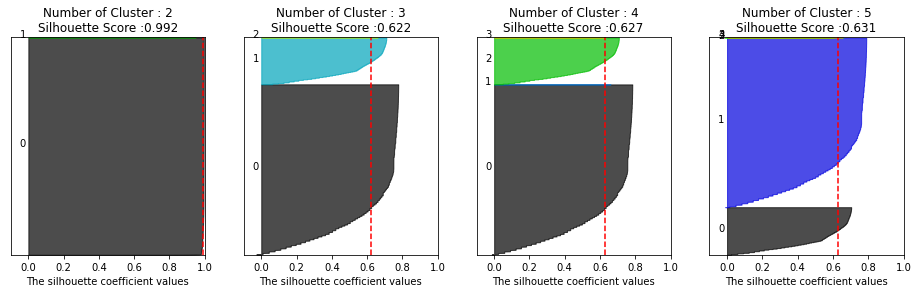

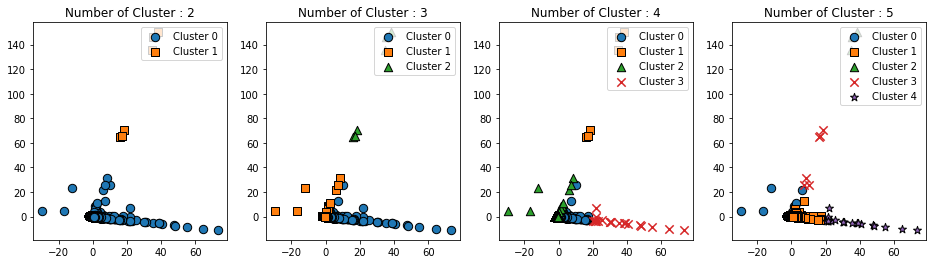

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

지나치게 왜곡된 데이터 세트는 K-평균과 같은 거리 기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과 도출

따라서 왜곡 정도 낮추기 위해 데이터 값에 로그 적용

In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
rfm_df_new['Recency_log'] = np.log1p(rfm_df_new['Recency'])
rfm_df_new['Frequency_log'] = np.log1p(rfm_df_new['Frequency'])
rfm_df_new['Monetary_log'] = np.log1p(rfm_df_new['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = rfm_df_new[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
rfm_df_new['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))     # cluster=3에서의 실루엣 점수(로그 변환 전보다는 스코어가 떨어짐)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

실루엣 스코어는 : 0.411


In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
rfm_df_old['Recency_log'] = np.log1p(rfm_df_old['Recency'])
rfm_df_old['Frequency_log'] = np.log1p(rfm_df_old['Frequency'])
rfm_df_old['Monetary_log'] = np.log1p(rfm_df_old['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = rfm_df_old[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
rfm_df_old['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))     # cluster=3에서의 실루엣 점수(로그 변환 전보다는 스코어가 떨어짐)

실루엣 스코어는 : 0.367


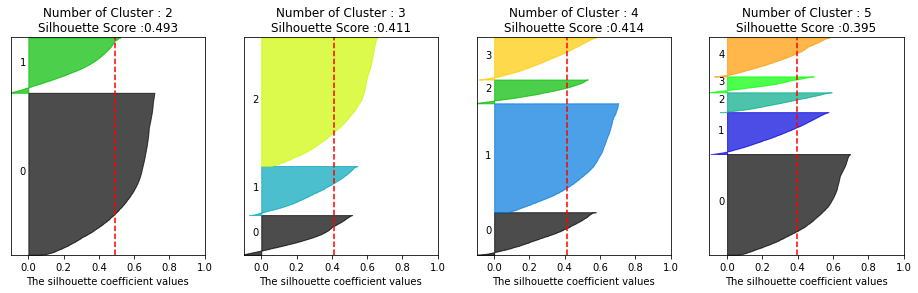

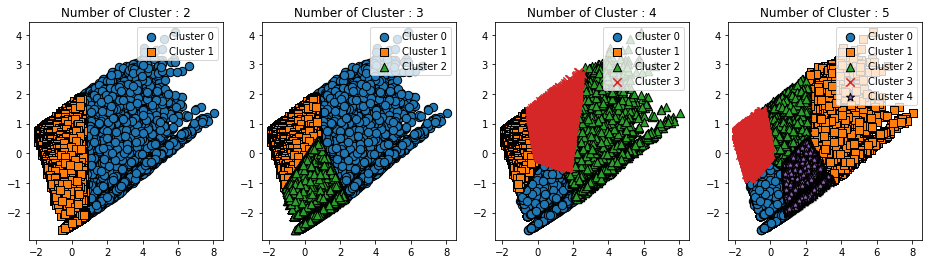

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)        # 아래를 보고 3개로 cluster하는 방법이 최적이라 판단하였음.

In [ ]:
rfm_df_new        # 고객 세그멘테이션(RFM방법) 결과 ['cluster_label']

@@결측치 수정후

In [ ]:
rfm_df_new.groupby(['cluster_label']).count()['CustomerID']    

cluster_label
0    15666
1    19358
2    50787
Name: CustomerID, dtype: int64

In [ ]:
rfm_df_old.groupby(['cluster_label']).count()['CustomerID']    

cluster_label
0    48069
1    17551
2    20239
Name: CustomerID, dtype: int64

# RFM기법으로 다음과 같이 고객 분류됨

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==0]['CustomerID']

[602468735,
 602468744,
 602468857,
 602468870,
 602468892,
 602468897,
 602468907,
 602468911,
 602469018,
 602469025,
 602469027,
 602469049,
 602469062,
 602469102,
 602469147,
 602469148,
 602469149,
 602469180,
 602469222,
 602469245,
 602469281,
 602469292,
 602469293,
 602469302,
 602469311,
 602469327,
 602469334,
 602469356,
 602469382,
 602469388,
 602469459,
 602469460,
 602469471,
 602469491,
 602469504,
 602469505,
 602469536,
 602469556,
 602469560,
 602469664,
 602469768,
 602469776,
 602469823,
 602469846,
 602469890,
 602469903,
 602469913,
 602469934,
 602469982,
 602470008,
 602470020,
 602470045,
 602470099,
 602470115,
 602470119,
 602470138,
 602470144,
 602470146,
 602470154,
 602470213,
 602470235,
 602470249,
 602470250,
 602470278,
 602470279,
 602470285,
 602470302,
 602470317,
 602470329,
 602470350,
 602470362,
 602470380,
 602470408,
 602470529,
 602470531,
 602470533,
 602470537,
 602470553,
 602470562,
 602470570,
 602470596,
 602470605,
 602470609,
 602

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==1]['CustomerID']

32       602468859
57       602468954
61       602468966
76       602469042
84       602469074
           ...    
85854    602839890
85855    602839893
85856    602839899
85857    602839900
85858    602839909
Name: CustomerID, Length: 19358, dtype: int64

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==2]['CustomerID']

0        602468719
1        602468721
2        602468732
3        602468733
5        602468737
           ...    
85794    602839443
85805    602839514
85808    602839526
85811    602839553
85819    602839635
Name: CustomerID, Length: 50787, dtype: int64

# 결과 분포로 확인

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==0]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==1]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==2]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==0]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==1]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==2]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==0]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==1]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label']==2]['Monetary'].describe()

# monetary = 총 거래량 vs 총 수수료 고객 비교

old 0    :48069
1    :17551
2    :20239
(2,1,0 순으로 거래소에 영향 주는 고객 집단)

new
0    :15666
1    :19358
2    :50787
(0,1,2 순으로 거래소에 영향 주는 고객 집단)

In [ ]:
lable0_new = list(rfm_df_new[rfm_df_new['cluster_label']==0]['CustomerID'].values)
lable1_new = list(rfm_df_new[rfm_df_new['cluster_label']==1]['CustomerID'].values)
lable2_new = list(rfm_df_new[rfm_df_new['cluster_label']==2]['CustomerID'].values)

lable0_old = list(rfm_df_old[rfm_df_old['cluster_label']==0]['CustomerID'].values)
lable1_old = list(rfm_df_old[rfm_df_old['cluster_label']==1]['CustomerID'].values)
lable2_old = list(rfm_df_old[rfm_df_old['cluster_label']==2]['CustomerID'].values)

교집합

In [ ]:
first_interaction = list(set(lable2_old) & set(lable0_new))
print( first_interaction )
print(len(first_interaction))

[602603521, 602505221, 602505222, 602832903, 602472457, 602603537, 602636307, 602800148, 602669077, 602734614, 602734616, 602832922, 602669083, 602832925, 602800162, 602669091, 602538020, 602603561, 602669101, 602701872, 602603569, 602832944, 602570803, 602832952, 602636345, 602767418, 602832959, 602472512, 602800193, 602832960, 602538051, 602603592, 602669128, 602734666, 602701899, 602734668, 602800211, 602734680, 602472538, 602669148, 602505311, 602538082, 602669156, 602800229, 602472553, 602636395, 602603628, 602734701, 602800236, 602603639, 602701944, 602472569, 602636413, 602603649, 602505351, 602669191, 602669193, 602734727, 602603660, 602767500, 602800271, 602734745, 602505370, 602800281, 602472605, 602800287, 602669216, 602833057, 602800290, 602833059, 602636457, 602472618, 602800297, 602833069, 602636463, 602669234, 602538165, 602570935, 602833081, 602636477, 602800322, 602800324, 602669255, 602636489, 602833104, 602734805, 602603734, 602767573, 602800342, 602603737, 602472666

In [ ]:
second_interaction = list(set(lable1_old) & set(lable1_new))
print( second_interaction )
print(len(second_interaction))

[602505218, 602537987, 602701828, 602505226, 602767371, 602570768, 602701840, 602800146, 602636309, 602734615, 602669081, 602767386, 602701852, 602570780, 602472478, 602832927, 602767396, 602538022, 602505255, 602734633, 602603563, 602570798, 602636334, 602767406, 602832950, 602669111, 602472504, 602570809, 602767415, 602734653, 602538046, 602701887, 602767422, 602832962, 602472515, 602505288, 602767433, 602832970, 602669134, 602767440, 602505298, 602669140, 602734676, 602767444, 602505303, 602669144, 602538074, 602734682, 602472543, 602538080, 602538081, 602669151, 602538084, 602570853, 602767461, 602669159, 602505321, 602767466, 602767468, 602538093, 602767470, 602767471, 602800238, 602767476, 602570873, 602767484, 602669182, 602505344, 602472577, 602734723, 602767492, 602472582, 602800266, 602701967, 602538128, 602472593, 602570897, 602734736, 602636441, 602800285, 602472606, 602669215, 602472608, 602570913, 602570915, 602701987, 602538151, 602570921, 602767529, 602734763, 602472622

In [ ]:
third_interaction = list(set(lable0_old) & set(lable2_new))
print( third_interaction )
print(len(third_interaction))

[602537984, 602669056, 602669066, 602669068, 602669069, 602669071, 602669072, 602669073, 602669074, 602800149, 602800151, 602538007, 602538008, 602800153, 602669084, 602669085, 602669089, 602669092, 602669094, 602538025, 602669097, 602800180, 602669109, 602800183, 602538040, 602800187, 602800189, 602538049, 602669121, 602800198, 602669135, 602800208, 602800212, 602669152, 602538085, 602669158, 602800237, 602538095, 602669170, 602538103, 602669177, 602800252, 602669184, 602800257, 602538114, 602669186, 602538125, 602669197, 602669198, 602669199, 602800269, 602669202, 602669201, 602538131, 602538137, 602538141, 602800286, 602669219, 602800292, 602669222, 602800296, 602669227, 602800301, 602669230, 602538159, 602669232, 602669233, 602800304, 602538164, 602669237, 602669238, 602669240, 602669241, 602800312, 602800317, 602538175, 602538176, 602538180, 602800326, 602538183, 602669257, 602538186, 602800334, 602538195, 602669267, 602538197, 602800340, 602538202, 602538210, 602669285, 602800358

차집합

In [ ]:
first_complement = list(set(lable0_new) - set(lable2_old))
print( first_complement )
print( len(first_complement) )

[602604423, 602794377, 602562954, 602647054, 602477949, 602591014, 602607528, 602520745, 602824104, 602780080, 602790208, 602581828, 602591301, 602787300, 602506228, 602811383, 602582264, 602661881, 602586621]
19


In [ ]:
second_complement = list(set(lable1_new) - set(lable1_old))
print( second_complement )
print( len(second_complement) )

[602800129, 602472454, 602480647, 602701832, 602742792, 602759177, 602808331, 602529817, 602742812, 602832928, 602816548, 602497063, 602570792, 602497065, 602562603, 602742828, 602611758, 602546227, 602660919, 602791991, 602570810, 602505281, 602824772, 602710085, 602832967, 602677331, 602701916, 602628191, 602718305, 602513507, 602759269, 602644587, 602595437, 602562670, 602742896, 602554483, 602734713, 602497147, 602759295, 602767489, 602824833, 602611848, 602783883, 602554508, 602554509, 602595471, 602579090, 602480789, 602677401, 602562714, 602792093, 602751136, 602513571, 602546342, 602677415, 602751145, 602497193, 602472619, 602636462, 602824878, 602505395, 602472632, 602595518, 602816706, 602833092, 602833094, 602644684, 602570958, 602775765, 602726619, 602734813, 602669278, 602775774, 602546400, 602710240, 602562785, 602611942, 602759401, 602611958, 602644728, 602530044, 602480897, 602775815, 602521865, 602734863, 602816784, 602833170, 602628371, 602611998, 602702113, 602579234

In [ ]:
third_complement = list(set(lable2_new) - set(lable0_old))
print( third_complement )
print( len(third_complement) )

[602677249, 602537988, 602832900, 602669065, 602619913, 602644490, 602644495, 602783769, 602677274, 602710050, 602472487, 602701866, 602800172, 602529836, 602710062, 602521648, 602644533, 602521663, 602669120, 602603591, 602554441, 602579018, 602710091, 602603597, 602472526, 602751058, 602808407, 602800218, 602562650, 602759264, 602488930, 602570852, 602677350, 602587238, 602513512, 602570859, 602472557, 602800241, 602562673, 602562676, 602693749, 602759284, 602669179, 602513534, 602800256, 602808451, 602824850, 602783891, 602611872, 602693793, 602701986, 602833061, 602710184, 602652843, 602833072, 602833073, 602751153, 602595507, 602775739, 602554557, 602685629, 602620105, 602611915, 602546381, 602644685, 602742992, 602751186, 602513624, 602579162, 602579167, 602800352, 602710242, 602800356, 602521833, 602710250, 602718447, 602743034, 602579195, 602792191, 602644736, 602743041, 602792199, 602824975, 602808595, 602636564, 602833175, 602800408, 602546457, 602644759, 602792215, 602579230

In [ ]:
first_complement_1 = list(set(lable2_old) - set(lable0_new))
print( first_complement_1 )
print( len(first_complement_1) )

[602800129, 602677249, 602537988, 602832900, 602472454, 602480647, 602701832, 602669065, 602742792, 602808331, 602619913, 602759177, 602644495, 602783769, 602677274, 602742812, 602832928, 602710050, 602816548, 602472487, 602570792, 602497063, 602497065, 602562603, 602800172, 602742828, 602611758, 602521648, 602546227, 602791991, 602570810, 602521663, 602505281, 602824772, 602710085, 602832967, 602554441, 602579018, 602710091, 602603597, 602751058, 602677331, 602808407, 602800218, 602701916, 602759264, 602718305, 602488930, 602513507, 602570852, 602759269, 602677350, 602587238, 602513512, 602570859, 602644587, 602595437, 602472557, 602742896, 602800241, 602554483, 602759284, 602693749, 602734713, 602497147, 602513534, 602759295, 602800256, 602824833, 602808451, 602611848, 602783883, 602554508, 602554509, 602824850, 602579090, 602783891, 602480789, 602677401, 602562714, 602792093, 602611872, 602751136, 602701986, 602513571, 602833061, 602546342, 602677415, 602710184, 602751145, 602497193

In [ ]:
second_complement_1 = list(set(lable1_old) - set(lable1_new))
print( second_complement_1 )
print( len(second_complement_1) )

[602501120, 602658818, 602691586, 602736647, 602798087, 602644490, 602624016, 602484759, 602615834, 602720282, 602697754, 602753058, 602769446, 602828839, 602701866, 602529836, 602697773, 602710062, 602644533, 602615862, 602812471, 602669120, 602607680, 602730560, 602712128, 602495042, 602519621, 602591301, 602603591, 602617928, 602794059, 602472526, 602839122, 602501203, 602533974, 602697815, 602562650, 602771549, 602716253, 602519647, 602613867, 602548337, 602562673, 602828915, 602562676, 602667123, 602787961, 602669179, 602605693, 602781827, 602806404, 602572940, 602589325, 602654863, 602599567, 602581144, 602583195, 602626209, 602693793, 602585262, 602833072, 602683568, 602595507, 602554557, 602835136, 602597576, 602548427, 602839247, 602632399, 602706130, 602751186, 602794196, 602831061, 602720471, 602513624, 602839261, 602800352, 602632423, 602679533, 602616048, 602548467, 602589427, 602470645, 602743034, 602575102, 602487045, 602648839, 602691854, 602814738, 602491159, 602792215

In [ ]:
third_complement_1 = list(set(lable0_old)-set(lable2_new))
print( third_complement_1 )
print( len(third_complement_1) )

[602757633, 602576898, 602681347, 602731010, 602753539, 602697224, 602594825, 602682378, 602762762, 602491916, 602803217, 602618898, 602571796, 602699799, 602490903, 602683417, 602740250, 602623511, 602651162, 602529817, 602627617, 602731042, 602472995, 602707492, 602618916, 602695206, 602576422, 602581543, 602590761, 602758186, 602769954, 602770115, 602744877, 602595886, 602803248, 602533939, 602660919, 602828346, 602560060, 602686013, 602496572, 602525245, 602655808, 602664510, 602748482, 602581575, 602576461, 602738259, 602749014, 602507352, 602758235, 602576989, 602524766, 602735711, 602692704, 602628191, 602787423, 602803304, 602772074, 602492011, 602614380, 602586221, 602562670, 602568302, 602592882, 602606707, 602525083, 602639477, 602821750, 602473079, 602648694, 602657987, 602657988, 602605692, 602473087, 602767489, 602655874, 602807940, 602595471, 602826386, 602674837, 602741909, 602534550, 602768025, 602790042, 602539164, 602804382, 602749088, 602749089, 602740390, 602772134

# cluster=5

In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
rfm_df_new['Recency_log'] = np.log1p(rfm_df_new['Recency'])
rfm_df_new['Frequency_log'] = np.log1p(rfm_df_new['Frequency'])
rfm_df_new['Monetary_log'] = np.log1p(rfm_df_new['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = rfm_df_new[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
rfm_df_new['cluster_label_5'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))     # cluster=3에서의 실루엣 점수(로그 변환 전보다는 스코어가 떨어짐)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

실루엣 스코어는 : 0.395


In [ ]:
cluster_labels = kmeans.fit_predict(X_features)

sil_avg = silhouette_score(X_features, cluster_labels)
sil_values = silhouette_samples(X_features, cluster_labels)

In [ ]:
ith_cluster_sil_values = sil_values[cluster_labels == 0]
ith_cluster_sil_values.sort()
ith_cluster_sil_values[ith_cluster_sil_values<0]

array([-8.08852310e-02, -8.00145580e-02, -7.97630873e-02, -7.94889244e-02,
       -7.93325468e-02, -7.91068897e-02, -7.89796584e-02, -7.87685250e-02,
       -7.86804252e-02, -7.86608586e-02, -7.86130122e-02, -7.83043186e-02,
       -7.77240069e-02, -7.75559396e-02, -7.74220444e-02, -7.73940689e-02,
       -7.73919715e-02, -7.73828939e-02, -7.73713748e-02, -7.73713113e-02,
       -7.72550801e-02, -7.72036272e-02, -7.68720932e-02, -7.67862585e-02,
       -7.65520834e-02, -7.62134509e-02, -7.60169591e-02, -7.59890754e-02,
       -7.59660731e-02, -7.57152804e-02, -7.56273542e-02, -7.55645733e-02,
       -7.54314049e-02, -7.52977011e-02, -7.52260910e-02, -7.52165681e-02,
       -7.49264078e-02, -7.48158338e-02, -7.45354020e-02, -7.43442929e-02,
       -7.42501176e-02, -7.41766174e-02, -7.37381028e-02, -7.36360486e-02,
       -7.35133391e-02, -7.31535694e-02, -7.28609868e-02, -7.28086421e-02,
       -7.26201181e-02, -7.23515927e-02, -7.23097091e-02, -7.21895475e-02,
       -7.19333495e-02, -

In [ ]:
i2th_cluster_sil_values = sil_values[cluster_labels == 1]
i2th_cluster_sil_values.sort()
# i2th_cluster_sil_values
i2th_cluster_sil_values[i2th_cluster_sil_values<0]

array([-9.53772777e-02, -9.51005363e-02, -9.18477572e-02, -9.04548135e-02,
       -8.99120515e-02, -8.90109976e-02, -8.89938642e-02, -8.80047560e-02,
       -8.79391257e-02, -8.78803988e-02, -8.77560915e-02, -8.73247933e-02,
       -8.69584033e-02, -8.68779655e-02, -8.67510227e-02, -8.64712285e-02,
       -8.64509089e-02, -8.61237915e-02, -8.57829133e-02, -8.57673990e-02,
       -8.56462137e-02, -8.52430048e-02, -8.51484337e-02, -8.47508335e-02,
       -8.47067936e-02, -8.46812283e-02, -8.43136129e-02, -8.42623294e-02,
       -8.42442975e-02, -8.36278545e-02, -8.36116546e-02, -8.33612230e-02,
       -8.31938494e-02, -8.30856641e-02, -8.30350063e-02, -8.28618351e-02,
       -8.28187754e-02, -8.27882987e-02, -8.27297240e-02, -8.25925242e-02,
       -8.23479376e-02, -8.18390477e-02, -8.16249555e-02, -8.11572933e-02,
       -8.07910819e-02, -8.03444424e-02, -8.02451061e-02, -8.01770231e-02,
       -7.99760535e-02, -7.99635799e-02, -7.99510083e-02, -7.97865429e-02,
       -7.94241612e-02, -

In [ ]:
i3th_cluster_sil_values = sil_values[cluster_labels == 2]
i3th_cluster_sil_values.sort()
i3th_cluster_sil_values.shape

(38223,)

In [ ]:
i4th_cluster_sil_values = sil_values[cluster_labels == 3]
i4th_cluster_sil_values.sort()
i4th_cluster_sil_values

array([-0.15820736, -0.15652841, -0.15256203, ...,  0.49028741,
        0.49058815,  0.4906325 ])

In [ ]:
i5th_cluster_sil_values = sil_values[cluster_labels == 4]
i5th_cluster_sil_values.sort()
i5th_cluster_sil_values

array([-0.04789611, -0.04744761, -0.04725345, ...,  0.57746676,
        0.57754643,  0.578231  ])

In [ ]:
rfm_df_new

In [ ]:
rfm_df_new.groupby(['cluster_label_5']).count()['CustomerID']    

cluster_label_5
0    39781
1    16538
2     7810
3     6277
4    15405
Name: CustomerID, dtype: int64

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==0]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==1]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==2]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==3]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==4]['Recency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==0]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==1]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==2]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==3]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==4]['Frequency'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==0]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==1]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==2]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==3]['Monetary'].describe()

In [ ]:
rfm_df_new[rfm_df_new['cluster_label_5']==4]['Monetary'].describe()